# CAPSTONE PROJECT:


# Table of Contents:

<div class="alert alert-block alert-info" style="margin-top: 20px">
<font size = 4.5>
    
1. <a href="#item1">[Introduction](#introduction)</a>  
2. <a href="#item2">[Data](#data)</a>  
3. <a href="#item3">[Methodology](#methodology)</a>  
4. <a href="#item4">[Results](#analysis)</a>  
5. <a href="#item5">[Discussion](#results)</a>  
6. <a href="#item6">[Conclusion](#conclusion)</a>  

</font>
</div>



***
## 1. Introduction: <a name="introduction"></a>
### Where would be the best place to open a South African restaurant in New York?

As a South African, I have not encountered any South African restaurants in New York City (NYC) that features different aspects of South African cooking. This means there is currently a niche in the market. I know a lot of South Africans in New York alone that miss the comfort of home cooking that brings out nostalgia in customers. South African cuisine varies between areas and cultural groups. There are indigenous dishes that have been created since the Khoisan settlers that came from central Africa. However, South Africa (SA) has been influenced by colonial periods where many other nationalities inhabited South Africa including Dutch, English and Indian. The background of South African food is important because with the many cultures included in cooking, different spices and methods are used to prepare the traditional meals. 

As the years have progressed, South Africans have immigrated into America at a gradual pace as well as South African tourists, students and workers contributing to the increasing population of South Africans in USA, especially in New York. The diversity of South African cuisine encourages the potential for great success across different ethnic groups. Nando's Chicken and Peri Peri restaurant is one very popular South African restaurant that has been franchised in other African countries, Europe and USA. However, there are no restaurants located in New York City - one of the most culturally diverse cities in the country. There are people who have traveled to Maryland and Virginia in order to buy Nando's. Opening up a Nando's store in NYC will be analysed to see how much of a success it will be not only for the African population living in NYC - but for everyone who enjoys chicken in various forms with a wide variety of sides.
***

***
## 2. Data

I will be collecting data to answer the following questions:

1) Are there any South African Restaurants in New York City?  

2) Is there a demand for a South African restaurant in NYC?  
   - Determine if amount of South Africans will be increased by the end of 2020   

3) Where would the best place be to open a Nando's restaurants in NYC?
   - Looking at how many South Africans reside in NYC
   - Which borough and neighborhood contain the most South Africans according to history
   - Projecting the amount of South Africans in NYC in 2020 to illustrate the feasibility of having a Nando's opening in NYC

#### Loading Libraries:

In [169]:
import requests
import pandas as pd
import numpy as np 
import random 
!pip install geocoder==1.5.0
!pip install folium==0.11.0
!pip install lxml

# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
import folium # plotting library
import json
import geocoder

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 


#import beautiful libraries
import urllib.request
import time
from urllib.request import urlopen
import urllib

#for reading files from assets in project folder
import types
from botocore.client import Config
import ibm_boto3

#libraries for methodology
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LinearRegression
import itertools
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline
from scipy import stats
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn import linear_model

print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


### 2.1 Segmenting and Clustering New York City:

- All information gathered from previous tutorials to create a dataframe segmenting New York neighbourhoods in the boroughs to help visualise data:

In [170]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')

Data downloaded!


In [171]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [172]:
neighborhoods_data = newyork_data['features']

In [173]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [174]:
#using the extracted dat to compile a dataframe 
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [175]:
#And make sure that the dataset has all 5 boroughs and 306 neighborhoods.
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


### 2.2 I will be exploring any current South African (SA) restaurants in New York City and determining the competition they may oppose, using Foursquare:

- I would like to explore any restaurants in NYC in order to determine the competition level

- Establishing Foursquare credentials:

In [176]:
CLIENT_ID = '***' 
CLIENT_SECRET = '***' 
VERSION = '20180604'
LIMIT = 30
print('My credentials:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

My credentials:
CLIENT_ID: 1CNV51WDL0HVJF1YLVIFT0NI0AK1HBDC2S2T0D4M0UCVINKW
CLIENT_SECRET:KRXO4PJIWLRWWCZY5JVSRHOJXHHIFRZYEGYOOECCUFEUDSK0


- Using geopy library to find out and displaying New York City's location:

In [177]:
address = 'New York, NY'

geolocator = Nominatim(user_agent="new_york_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geographical coordinate of New York are {}, {}.'.format(latitude, longitude))

The geographical coordinate of New York are 40.7127281, -74.0060152.


- Creating a search query for South African restaurants in New York City:

In [178]:
search_query = 'South African'
radius = 1000
print(search_query + ' .... OK!')

South African .... OK!


In [179]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=1CNV51WDL0HVJF1YLVIFT0NI0AK1HBDC2S2T0D4M0UCVINKW&client_secret=KRXO4PJIWLRWWCZY5JVSRHOJXHHIFRZYEGYOOECCUFEUDSK0&ll=40.7127281,-74.0060152&v=20180604&query=South African&radius=1000&limit=30'

In [180]:
sa_restaurant_results = requests.get(url).json()

- Extracts results into a dataframe:

In [181]:
sa_restaurant_df = json_normalize(sa_restaurant_results['response']['venues'])

In [182]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in sa_restaurant_df.columns if col.startswith('location.')] + ['id']
dataframe_filtered = sa_restaurant_df.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,South Street Seaport,Harbor / Marina,South St,US,New York,United States,Pier 17,678,"[South St (Pier 17), New York, NY 10038, Unite...",NaN,40.706896,-74.003671,10038,NY,3fd66200f964a520daf11ee3
1,African Burial Ground National Monument,Monument / Landmark,290 Broadway,US,New York,United States,NaN,255,"[290 Broadway, New York, NY 10007, United States]","[{'label': 'display', 'lat': 40.71498975306652...",40.714990,-74.005530,10007,NY,4a9442e3f964a520f92020e3
2,9/11 Memorial South Pool,Memorial Site,West St,US,New York,United States,at Liberty St,625,"[West St (at Liberty St), New York, NY 10007, ...","[{'label': 'display', 'lat': 40.711039, 'lng':...",40.711039,-74.013082,10007,NY,587ffcc3ea29b80cdce3468d
3,South Cove Park,Plaza,50 Battery Pl,US,New York,United States,btw 1st & 3rd Pl,1194,"[50 Battery Pl (btw 1st & 3rd Pl), New York, N...","[{'label': 'display', 'lat': 40.7072926419875,...",40.707293,-74.018223,10280,NY,4b8448bbf964a520672c31e3
4,East River Esplanade South Dog Run,Dog Run,South St,US,New York,United States,Wall St,921,"[South St (Wall St), New York, NY 10038, Unite...","[{'label': 'display', 'lat': 40.70445304662184...",40.704453,-74.005814,10038,NY,4e0a48b46284cf220c358959
5,Lecture Hall South,College Classroom,1 Pace Plz,US,New York,United States,btwn Nassau & Gold St,157,"[1 Pace Plz (btwn Nassau & Gold St), New York,...","[{'label': 'display', 'lat': 40.71135707966446...",40.711357,-74.005550,10038,NY,4e9dd2f802d52778064d114b
6,South Street Seaport - Skyline Bus Tour,Bus Line,NaN,US,New York,United States,South & Fulton,787,"[South & Fulton, New York, NY, United States]","[{'label': 'display', 'lat': 40.70602646, 'lng...",40.706026,-74.003021,NaN,NY,51f9221f8bbd3fa0118328fb
7,Wok Wok Southeast Asian Kitchen,Malay Restaurant,11 Mott St,US,New York,United States,NaN,623,"[11 Mott St, New York, NY 10013, United States]","[{'label': 'display', 'lat': 40.71405586781807...",40.714056,-73.998839,10013,NY,55b52904498edca26ecc7a7f
8,South Street Seaport Mall,Shopping Mall,19 Fulton St,US,New York,United States,at Water St,668,"[19 Fulton St (at Water St), New York, NY 1003...","[{'label': 'display', 'lat': 40.70695926434493...",40.706959,-74.003798,10038,NY,4ddfd7107d8b04e50266d1cf
9,"New York Water Taxi - Pier 16, South St Seaport",Boat or Ferry,89 South St,US,New York,United States,Pier 16,917,"[89 South St (Pier 16), New York, NY 10038, Un...","[{'label': 'display', 'lat': 40.70501592631589...",40.705016,-74.002191,10038,NY,4cdae82bb34e60fce7474499


- ##### There are no South African restaurants in New York City area therefore there is a gap in the market for one.

### 2.3 Research all Nando's restaurants in USA:

- Explore all Nando's restaurants in Chicago, using Foursquare:

In [183]:
address = 'Chicago, United States'

geolocator = Nominatim(user_agent="chicago_explorer")
chicago_location = geolocator.geocode(address)
chicago_latitude = chicago_location.latitude
chicago_longitude = chicago_location.longitude
print('The geographical coordinate of Chicago are {}, {}.'.format(chicago_latitude, chicago_longitude))

The geographical coordinate of Chicago are 41.8755616, -87.6244212.


- Creates search query for Nando's peri Peri restaurants:

In [184]:
nandos_search_query = 'Nando\'s Peri Peri'
nandos_radius = 100000
usa_LIMIT = 200
print(nandos_search_query + ' .... OK!')

Nando's Peri Peri .... OK!


In [185]:
nandos_url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, chicago_latitude, chicago_longitude, VERSION, nandos_search_query, nandos_radius, usa_LIMIT)
nandos_url

"https://api.foursquare.com/v2/venues/search?client_id=1CNV51WDL0HVJF1YLVIFT0NI0AK1HBDC2S2T0D4M0UCVINKW&client_secret=KRXO4PJIWLRWWCZY5JVSRHOJXHHIFRZYEGYOOECCUFEUDSK0&ll=41.8755616,-87.6244212&v=20180604&query=Nando's Peri Peri&radius=100000&limit=200"

In [186]:
nandos_results = requests.get(nandos_url).json()
nandos_results

{'meta': {'code': 200, 'requestId': '5f6f736cc96e3e511e1a45d6'},
 'response': {'venues': [{'id': '59aed71ed552c7632d13c4ee',
    'name': "Nando's Peri-Peri",
    'location': {'address': '117 E Lake St',
     'lat': 41.88569436185178,
     'lng': -87.624279366855,
     'labeledLatLngs': [{'label': 'display',
       'lat': 41.88569436185178,
       'lng': -87.624279366855}],
     'distance': 1128,
     'postalCode': '60601',
     'cc': 'US',
     'neighborhood': 'The Loop',
     'city': 'Chicago',
     'state': 'IL',
     'country': 'United States',
     'formattedAddress': ['117 E Lake St',
      'Chicago, IL 60601',
      'United States']},
    'categories': [{'id': '4def73e84765ae376e57713a',
      'name': 'Portuguese Restaurant',
      'pluralName': 'Portuguese Restaurants',
      'shortName': 'Portuguese',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/portuguese_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1601139564',
    'hasPe

In [187]:
'There are {} around Chicago.'.format(len(nandos_results['response']['venues']))

'There are 50 around Chicago.'

- Extract search results from Chicago into a dataframe:

In [188]:
# assign relevant part of JSON to venues
nandos_venues = nandos_results['response']['venues']

# tranform venues into a dataframe
nandos_chicago_df = json_normalize(nandos_venues)

In [189]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in nandos_chicago_df.columns if col.startswith('location.')] + ['id']
dataframe_filtered1 = nandos_chicago_df.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered1['categories'] = dataframe_filtered1.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered1.columns = [column.split('.')[-1] for column in dataframe_filtered1.columns]

dataframe_filtered1 = dataframe_filtered1[dataframe_filtered1['name'].str.contains('Nando\'s')]
dataframe_filtered1.drop(['crossStreet'], axis = 1,  inplace = True)

- Explore all Nando's restaurants in Washington DC, Virginia, Maryland area (DMV), using Foursquare:

In [190]:
#finding washington, DC lattitude and longitude coordinates to  use in foursquare
address = 'Washington,DC'

geolocator = Nominatim(user_agent="dmv_explorer")
dmv_location = geolocator.geocode(address)
dmv_latitude = dmv_location.latitude
dmv_longitude = dmv_location.longitude
print('The geograpical coordinate of Washington, DC are {}, {}.'.format(dmv_latitude, dmv_longitude))

The geograpical coordinate of Washington, DC are 38.8949855, -77.0365708.


In [191]:
#search all nandoes in Washington area
nandos1_url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, dmv_latitude, dmv_longitude, VERSION, nandos_search_query, nandos_radius, usa_LIMIT)
nandos1_url

"https://api.foursquare.com/v2/venues/search?client_id=1CNV51WDL0HVJF1YLVIFT0NI0AK1HBDC2S2T0D4M0UCVINKW&client_secret=KRXO4PJIWLRWWCZY5JVSRHOJXHHIFRZYEGYOOECCUFEUDSK0&ll=38.8949855,-77.0365708&v=20180604&query=Nando's Peri Peri&radius=100000&limit=200"

In [192]:
nandos1_results = requests.get(nandos1_url).json()
nandos1_results

{'meta': {'code': 200, 'requestId': '5f6f736d86ebb970eae482d5'},
 'response': {'venues': [{'id': '5106bffae4b0cbc88a16c069',
    'name': "Nando's PERi-PERi Central Office",
    'location': {'lat': 38.900403999999995,
     'lng': -77.02160400000001,
     'labeledLatLngs': [{'label': 'display',
       'lat': 38.900403999999995,
       'lng': -77.02160400000001},
      {'label': 'entrance', 'lat': 38.900404, 'lng': -77.021793}],
     'distance': 1430,
     'postalCode': '20001',
     'cc': 'US',
     'city': 'Washington',
     'state': 'D.C.',
     'country': 'United States',
     'formattedAddress': ['Washington, D.C. 20001', 'United States']},
    'categories': [{'id': '4bf58dd8d48988d124941735',
      'name': 'Office',
      'pluralName': 'Offices',
      'shortName': 'Office',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/default_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1601139565',
    'hasPerk': False},
   {'id': '5aa6ab5

In [193]:
'There are {} around DMV area.'.format(len(nandos1_results['response']['venues']))

'There are 50 around DMV area.'

In [194]:
# assign relevant part of JSON to venues
nandos_venues1 = nandos1_results['response']['venues']

# tranform venues into a dataframe
nandos_dmv_df = json_normalize(nandos_venues1)

In [195]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in nandos_dmv_df.columns if col.startswith('location.')] + ['id']
dataframe_filtered2 = nandos_dmv_df.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered2['categories'] = dataframe_filtered2.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered2.columns = [column.split('.')[-1] for column in dataframe_filtered2.columns]

dataframe_filtered2 = dataframe_filtered2[dataframe_filtered2['name'].str.contains('Nando\'s')]
dataframe_filtered2.drop(['crossStreet'], axis = 1,  inplace = True)

dataframe_filtered2 = dataframe_filtered2.drop(dataframe_filtered2.index[0])

In [196]:
nandos_df_final = pd.concat([dataframe_filtered1, dataframe_filtered2], axis = 0)

- Displays amount of rows and columns in dataframe respectively. The 34 rows show that there are 34 Nando's restaurants in USA, found by Foursquare.

In [197]:
nandos_df_final.shape

(34, 15)

- #### Displaying final dataframe with all Nando's locations found in Foursquare data:

In [198]:
nandos_df_final

,name,categories,address,cc,city,country,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,Nando's Peri-Peri,Portuguese Restaurant,117 E Lake St,US,Chicago,United States,1128,"[117 E Lake St, Chicago, IL 60601, United States]","[{'label': 'display', 'lat': 41.88569436185178...",41.885694,-87.624279,The Loop,60601,IL,59aed71ed552c7632d13c4ee
1,Nando's Peri-Peri,Portuguese Restaurant,227 E Ontario St,US,Chicago,United States,1993,"[227 E Ontario St, Chicago, IL 60611, United S...","[{'label': 'display', 'lat': 41.89334608148888...",41.893346,-87.621604,NaN,60611,IL,57a77b9ccd10b3ef21d62622
2,Nando's Peri-Peri,Portuguese Restaurant,22 S Wabash Ave,US,Chicago,United States,656,"[22 S Wabash Ave, Chicago, IL 60603, United St...","[{'label': 'display', 'lat': 41.88132517058762...",41.881325,-87.626106,NaN,60603,IL,5652164f498e36174c80c9d5
3,Nando's Peri-Peri,Portuguese Restaurant,1005 S Delano Ct E,US,Chicago,United States,951,"[1005 S Delano Ct E (no), Chicago, IL 60605, U...","[{'label': 'display', 'lat': 41.86961552058229...",41.869616,-87.632662,South Loop,60605,IL,57916296498e390c2b6789cd
4,Nando's Peri-Peri,Portuguese Restaurant,523 Oakbrook Ctr,US,Oak Brook,United States,27316,"[523 Oakbrook Ctr, Oak Brook, IL 60523, United...","[{'label': 'display', 'lat': 41.85196765881677...",41.851968,-87.952390,NaN,60523,IL,582bcbf3b4f96227bc841dd9
5,Nando's Peri-Peri,Portuguese Restaurant,1447 E 53rd St,US,Chicago,United States,8948,"[1447 E 53rd St, Chicago, IL 60615, United Sta...","[{'label': 'display', 'lat': 41.79939796688211...",41.799398,-87.589921,Hyde Park,60615,IL,5879756edebdf66d8d988415
6,Nando's Peri-Peri,Portuguese Restaurant,1138 Lake St,US,Oak Park,United States,14978,"[1138 Lake St, Oak Park, IL 60301, United States]","[{'label': 'display', 'lat': 41.88868248371064...",41.888682,-87.804284,NaN,60301,IL,5723f8cd498e225a55db86e4
7,Nando's Peri-Peri,Portuguese Restaurant,1500 N Clybourn Ave,US,Chicago,United States,4143,"[1500 N Clybourn Ave, Chicago, IL 60610, Unite...","[{'label': 'display', 'lat': 41.90864069497578...",41.908641,-87.647344,Near North,60610,IL,56082509498e965f8c47da3c
8,Nando's Peri-Peri,Portuguese Restaurant,4999 Old Orchard Ctr,US,Skokie,United States,23120,"[4999 Old Orchard Ctr, Skokie, IL 60077, Unite...","[{'label': 'display', 'lat': 42.06106950200311...",42.061070,-87.750040,NaN,60077,IL,582b45bb0839692c503a3a02
9,Nando's Peri-Peri,Portuguese Restaurant,6 W Jefferson Ave,US,Naperville,United States,44920,"[6 W Jefferson Ave, Naperville, IL 60540, Unit...","[{'label': 'display', 'lat': 41.77284854418508...",41.772849,-88.148100,NaN,60540,IL,56edd744cd10c4efe37e197f


### 2.4 Collecting information regarding all South African visas processed between 2001 and 2019:

- I downloaded the all visa pdf files from www.travel.state.gov and then converted it to csv format for ease of use to make it simpler to put into the notebook
- I will also add a total column to the final dataframes for simplicity when building the model  
*Note:* I had to import the csv file by adding data option and inserting the file that included the codes below as well as importing the libraries needed above

- Immigrant visa data being extracted:

In [199]:
# The code was removed by Watson Studio for sharing.

In [200]:
body = client_a65cf93f5b9043d3acc137cab7f57621.get_object(Bucket='courseracapstoneproject-donotdelete-pr-isypujnflig1pw',Key='Immigrant1.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

immigrant_visa_df1 = pd.read_csv(body)
immigrant_visa_df1 = immigrant_visa_df1[5:33]
immigrant_visa_df1.rename(columns = {'Unnamed: 0': 'Nationality', 'Unnamed: 1': '2001', 'Unnamed: 2': '2002', 'Table XV': '2003', 'Unnamed: 4': '2004', 'Unnamed: 5': '2005', 'Unnamed: 6': '2006', 'Unnamed: 7': '2007', 'Unnamed: 8': '2008', 'Unnamed: 9': '2009', 'Unnamed: 10': '2010'}, inplace = True)
immigrant_visa_df1.drop(['2010'], axis = 1, inplace = True)

In [201]:
body1 = client_a65cf93f5b9043d3acc137cab7f57621.get_object(Bucket='courseracapstoneproject-donotdelete-pr-isypujnflig1pw',Key='Immigrant2.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body1, "__iter__"): body1.__iter__ = types.MethodType( __iter__, body1 )

immigrant_visa_df2 = pd.read_csv(body1)
immigrant_visa_df2 = immigrant_visa_df2[6:36]
immigrant_visa_df2.rename(columns = {'Unnamed: 0': 'Nationality', 'FY 2019 data are preliminary and subject to change.': '2010', 'Unnamed: 2': '2011', 'Unnamed: 3': '2012', 'Unnamed: 4': '2013', 'Unnamed: 5': '2014', 'Unnamed: 6': '2015', 'Unnamed: 7': '2016', 'Unnamed: 8': '2017', 'Unnamed: 9': '2018', 'Unnamed: 10': '2019'}, inplace = True)

- Joins Immigrant visa tables together to form one dataframe:

In [202]:
imm_visa_df = pd.merge(immigrant_visa_df1, immigrant_visa_df2, on='Nationality')
imm_visa_df = imm_visa_df[imm_visa_df['Nationality'] == 'South Africa, Johannesburg']#filter data to only show South Africa
imm_visa_df.replace(',','', inplace = True) 
imm_visa_df.replace('South Africa, Johannesburg', 'South African', inplace = True)

- Nonimmigrant visa data being extracted:

In [203]:
body2 = client_a65cf93f5b9043d3acc137cab7f57621.get_object(Bucket='courseracapstoneproject-donotdelete-pr-isypujnflig1pw',Key='Nonimmigrant1 (2).csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body2, "__iter__"): body2.__iter__ = types.MethodType( __iter__, body2 )

nonimmigrant_visa_df1 = pd.read_csv(body2)
nonimmigrant_visa_df1 = nonimmigrant_visa_df1[5:64]
nonimmigrant_visa_df1.rename(columns = {'Unnamed: 0': 'Nationality', 'Unnamed: 1': '2001', 'Unnamed: 2': '2002', 'Table XVIII': '2003', 'Unnamed: 4': '2004', 'Unnamed: 5': '2005', 'Unnamed: 6': '2006', 'Unnamed: 7': '2007', 'Unnamed: 8': '2008', 'Unnamed: 9': '2009', 'Unnamed: 10': '2010'}, inplace = True)
nonimmigrant_visa_df1.drop([36,  37, 38, 39, 40], axis = 0, inplace = True)
nonimmigrant_visa_df1.drop(['2010'], axis = 1, inplace = True)

In [204]:
body3 = client_a65cf93f5b9043d3acc137cab7f57621.get_object(Bucket='courseracapstoneproject-donotdelete-pr-isypujnflig1pw',Key='Nonimmigrant2 (2).csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body3, "__iter__"): body3.__iter__ = types.MethodType( __iter__, body3 )

nonimmigrant_visa_df2 = pd.read_csv(body3)
nonimmigrant_visa_df2 = nonimmigrant_visa_df2[6:67]
nonimmigrant_visa_df2.rename(columns = {'Unnamed: 0': 'Nationality', 'Unnamed: 1': '2010', 'FY 2019 data are preliminary and subject to change.': '2011', 'Unnamed: 3': '2012', 'Unnamed: 4': '2013', 'Unnamed: 5': '2014', 'Unnamed: 6': '2015', 'Unnamed: 7': '2016', 'Unnamed: 8': '2017', 'Unnamed: 9': '2018', 'Unnamed: 10': '2019'}, inplace = True)
nonimmigrant_visa_df2.drop([37, 38, 39, 40, 41, 42], axis = 0, inplace = True)

- Joins nonimmgrant visa tables together to form one dataframe:

In [205]:
nonimm_visa_df = pd.merge(nonimmigrant_visa_df1, nonimmigrant_visa_df2, on='Nationality')
nonimm_visa_df = nonimm_visa_df[nonimm_visa_df['Nationality'] == 'South Africa']#filter data to only show South Africa
nonimm_visa_df.replace(',','', inplace = True) 
nonimm_visa_df.replace('South Africa', 'South African', inplace = True)

Join the nonimmigrant and immigrant dataframes into one dataframe, replace string number valeus as integers and total all the columns to help with the data analysis section:

In [206]:
visa_df = pd.concat([nonimm_visa_df, imm_visa_df])
visa_df['2001'] = visa_df['2001'].str.replace(",","").astype(int)
visa_df['2002'] = visa_df['2002'].str.replace(",","").astype(int)
visa_df['2003'] = visa_df['2003'].str.replace(",","").astype(int)
visa_df['2004'] = visa_df['2004'].str.replace(",","").astype(int)
visa_df['2005'] = visa_df['2005'].str.replace(",","").astype(int)
visa_df['2006'] = visa_df['2006'].str.replace(",","").astype(int)
visa_df['2007'] = visa_df['2007'].str.replace(",","").astype(int)
visa_df['2008'] = visa_df['2008'].str.replace(",","").astype(int)
visa_df['2009'] = visa_df['2009'].str.replace(",","").astype(int)
visa_df['2010'] = visa_df['2010'].str.replace(",","").astype(int)
visa_df['2011'] = visa_df['2011'].str.replace(",","").astype(int)
visa_df['2012'] = visa_df['2012'].str.replace(",","").astype(int)
visa_df['2013'] = visa_df['2013'].str.replace(",","").astype(int)
visa_df['2014'] = visa_df['2014'].str.replace(",","").astype(int)
visa_df['2015'] = visa_df['2015'].str.replace(",","").astype(int)
visa_df['2016'] = visa_df['2016'].str.replace(",","").astype(int)
visa_df['2017'] = visa_df['2017'].str.replace(",","").astype(int)
visa_df['2018'] = visa_df['2018'].str.replace(",","").astype(int)
visa_df['2019'] = visa_df['2019'].str.replace(",","").astype(int)
visa_df = visa_df.append(visa_df.sum(numeric_only=True), ignore_index=True)
visa_df = visa_df.replace(np.nan, 'Total South African Visas', regex=True)

### 2.5 Collect data to determine which neighborhood is best to open the Nandos restaurant in NYC:


#### 2.5.1 Restaurants in New York City

- I will use this data to isolate the neighbourhoods I am looking at closer at in order to find the least restaurant-dense area to open my restaurant

In [207]:
body4 = client_a65cf93f5b9043d3acc137cab7f57621.get_object(Bucket='courseracapstoneproject-donotdelete-pr-isypujnflig1pw',Key='Restaurants__rolled_up_.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body4, "__iter__"): body4.__iter__ = types.MethodType( __iter__, body4 )

nyc_res_df = pd.read_csv(body4)
nyc_res_df.drop(['CAMIS'], axis = 1, inplace = True)
nyc_res_df.drop(['BUILDING'], axis = 1, inplace = True)
br_res_df = nyc_res_df[nyc_res_df.BORO.str.contains('Brooklyn')]


#### 2.5.2 Determining immigration to America from all African countries.

- I used tables extracted from www.wikipedia.com and www.baruch.cuny.edu

In [208]:
immigration_df = pd.read_html("https://en.wikipedia.org/wiki/African_immigration_to_the_United_States")[1]

- Removing percentage columns given that there is no added data:

In [209]:
immigration_df = immigration_df[['Ancestry', '2000', '2010']]

- Columns are converted to lists:

In [210]:
type(immigration_df.columns.tolist())
type(immigration_df.index.tolist())

list

#### 2.5.4 Determine the African immigration population distributed between main cities in USA:

- I used webscraping to get data from tables from https://en.wikipedia.org/wiki/African_immigration_to_the_United_States

In [211]:
city_immigration_df = pd.read_html('https://en.wikipedia.org/wiki/African_immigration_to_the_United_States')[2]

#### 2.5.5 Determine the amount of South Africans in America for the years 2010 to 2017:

- I used webscraping to get data from tables from https://en.wikipedia.org/wiki/South_African_Americans

In [212]:
sa_in_usa_df = pd.read_html('https://en.wikipedia.org/wiki/South_African_Americans')[2]

In [213]:
type(sa_in_usa_df.columns.tolist())
type(sa_in_usa_df.index.tolist())

list

#### 2.5.6 Determine distribution of Africans into NYC boroughs for the year 2019:

- I used webscraping to get data from tables from https://www.baruch.cuny.edu/nycdata/population-geography/foreign-birthcountry.htm

In [214]:
borough_distr_df = pd.read_html('https://www.baruch.cuny.edu/nycdata/population-geography/foreign-birthcountry.htm')[0]

In [215]:
type(borough_distr_df.columns.tolist())
type(borough_distr_df.index.tolist())

list

In [216]:
borough_distr_df = borough_distr_df[[1, 2, 3, 4, 5, 6, 7]]

For simplicity, I will clean out the column headings:

In [217]:
borough_distr_df.rename(columns = {1: 'Country of Birth', 
                                   2: 'Total NYC', 
                                   3: 'Bronx', 
                                   4: 'Brooklyn - Kings', 
                                   5: 'Manhattan - New York', 
                                   6: 'Queens', 
                                   7: 'Staten Island - Richmond'}, inplace = True)

In [218]:
borough_distr_df = borough_distr_df[4:67]

Filter dataframe to only display African immigration information:

In [219]:
borough_final_df = borough_distr_df[borough_distr_df['Country of Birth'].str.contains('Africa')]

***
## 3. METHODOLOGY: <a name="methodology"></a>

- I used different tables of data extracted to ensure I can properly predict how many South Africans would reside in New York City
- Some tables might be left obselete in the conclusion

#### 3.1 Using analysis to determine the success of a Nando's being opened in New York City:

In [220]:
immigration_df = immigration_df[immigration_df['Ancestry'] == 'South African']
immigration_df

,Ancestry,2000,2010
25,South African,"44,991[16]","57,491[17]"


#### 3.2 Using exploratory analysis to determine how many South Africans will reside in NYC in 2020:

In [221]:
sa_in_usa_df.rename(columns = {'Number': 'Amount of South Africans'}, inplace = True)

In [222]:
sa_in_usa_df

,Year,Amount of South Africans
0,2010,77985
1,2011,87699
2,2012,85528
3,2013,95191
4,2014,92218
5,2015,94141
6,2016,104889
7,2017,111720


Text(0.5, 1.0, 'Linear Regression of the Amount of South Africans Residing in USA from 2010 to 2017')

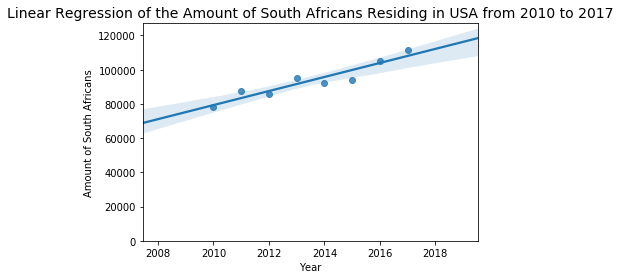

In [248]:
sns.regplot(x="Year", y="Amount of South Africans", data=sa_in_usa_df)
plt.ylim(0,)
plt.title('Linear Regression of the Amount of South Africans Residing in USA from 2010 to 2017', fontsize = 14)

In [224]:
lr1 = LinearRegression()
lr1

X1 = sa_in_usa_df[['Year']]
Y1 = sa_in_usa_df['Amount of South Africans']

lr1.fit(X1,Y1)

Yhat1=lr1.predict(X1)
Yhat1[0:10] 

a1 = lr1.intercept_
b1 = lr1.coef_

pearson_coef1, p_value1 = stats.pearsonr(sa_in_usa_df['Year'], sa_in_usa_df['Amount of South Africans'])
print('The x-intercept is: ', int(a1), 
      '\nThe coeffiecient is:' , int(b1), 
      '\nThe Pearson Correlation Coefficient is', pearson_coef1, 
      '\nThe P-value of P =', p_value1)


The x-intercept is:  -8175125 
The coeffiecient is: 4106 
The Pearson Correlation Coefficient is 0.9384534428165742 
The P-value of P = 0.0005562698212109472


- The correlation between the data is very high therefore the linear regression is the best fit for this model
- The P-value is less than 0.001 which is a great indicator for the given regression
- To predict the amount of South Africans living in USA in 2020, I will need to use the equation Yhat = a + b x (x) ie Amount of SA immigrants in 2020 = -8175125 + 4106 x (x)

In [225]:
imm_2020_estimate1 = a1 + b1*2020
print('The amount of South African\'s residing in New York in 2020 is predicted to be: ', int(imm_2020_estimate1))

The amount of South African's residing in New York in 2020 is predicted to be:  120364


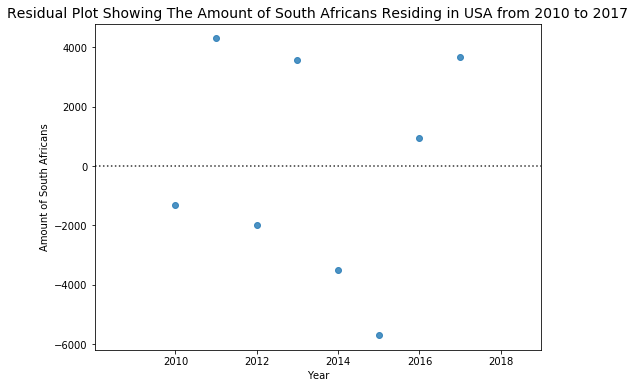

In [226]:
width = 8
height = 6
plt.figure(figsize=(width, height))
plt.title('Residual Plot Showing The Amount of South Africans Residing in USA from 2010 to 2017', fontsize = 14)
sns.residplot(sa_in_usa_df['Year'], sa_in_usa_df['Amount of South Africans'])
plt.show()

- The points in the residual plot above are randomly spread out around the x-axis
- The variance is constant making the  linear model is a good fit for this data

In [227]:
#set up train-test split of data

x_train1, x_test1, y_train1, y_test1 = train_test_split(sa_in_usa_df[['Year']], 
                                                        sa_in_usa_df['Amount of South Africans'], 
                                                        test_size = 0.15, 
                                                        random_state = 1)
print('The number of test samples: ', x_test1.shape[0])
print('The number of training samples: ', x_train1.shape[0])

The number of test samples:  2
The number of training samples:  6


In [228]:
Rcross1 = cross_val_score(lr1, sa_in_usa_df[['Year']], sa_in_usa_df['Amount of South Africans'], cv = 4)
print('The cross valuation Score\'s mean is: ', Rcross1.mean())
print('The cross valuation Score\'s standard deviation is: ',Rcross1.std())

The cross valuation Score's mean is:  -12.840375125376966
The cross valuation Score's standard deviation is:  20.217012636361112


In [229]:
regr = linear_model.LinearRegression()

test_x1 = np.asanyarray(sa_in_usa_df[['Year']])
test_y1 = np.asanyarray(sa_in_usa_df['Amount of South Africans'])
regr.fit(test_x1, test_y1)
test_yhat1 = regr.predict(test_x1)

print('EVALUATION METRICS:')
print('Mean Absolute Error: ', np.mean(np.absolute(test_yhat1 - test_y1)))
print('Mean Squared Error: ', np.mean((test_yhat1 - test_y1)**2))
print('R2-Score: ', r2_score(test_yhat1, test_y1))


EVALUATION METRICS:
Mean Absolute Error:  3123.366071428638
Mean Squared Error:  11994286.066964373
R2-Score:  0.8645329494956187


In [230]:
visa_df

,Nationality,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,South African,66541.0,49805.0,51347.0,56634.0,61063.0,57767.0,58357.0,61801.0,49960.0,51052.0,60152.0,62516.0,59038.0,60238.0,61997.0,61273.0,61839.0,68950.0,66331.0
1,South African,1243.0,971.0,1005.0,740.0,781.0,796.0,594.0,694.0,868.0,868.0,930.0,841.0,921.0,901.0,1006.0,1123.0,1203.0,1174.0,1043.0
2,Total South African Visas,67784.0,50776.0,52352.0,57374.0,61844.0,58563.0,58951.0,62495.0,50828.0,51920.0,61082.0,63357.0,59959.0,61139.0,63003.0,62396.0,63042.0,70124.0,67374.0


In [231]:
visa_df.rename(columns = {'Nationality': 'Year'}, inplace = True)
visa_df_t = visa_df.transpose()
visa_df_t.rename(columns = {2:'Total South African Visas'}, inplace = True)
visa_df_t['Year'] = ['', 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
visa_df_t = visa_df_t.iloc[1:]
visa_df_t = visa_df_t[['Total South African Visas', 'Year']]

- I will only be working with the total column for the exploratory data analysis of the visas issued to predict the 2020 visas issued

In [232]:
X2 = visa_df_t[['Year']].values
Y2 = visa_df_t['Total South African Visas'].values

In [233]:
# creating pipeline and fitting it on data
Input=[('polynomial',PolynomialFeatures(degree=2)),('modal',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(X2.reshape(-1,1),Y2.reshape(-1,1))

Pipeline(memory=None,
     steps=[('polynomial', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('modal', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

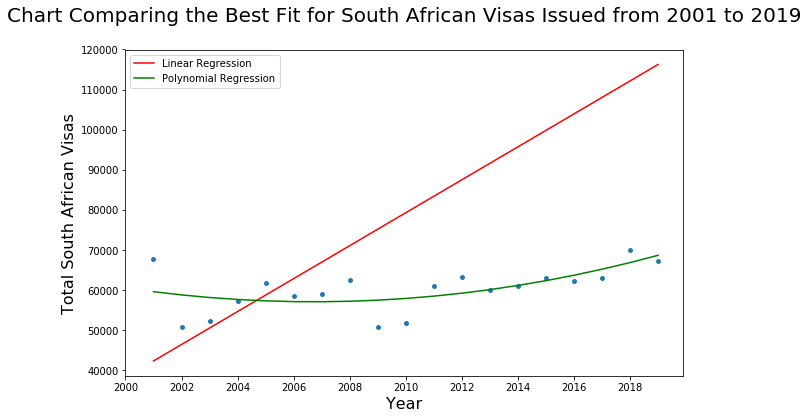

In [234]:
y_pred=lr1.predict(X2.reshape(-1,1))
poly_pred=pipe.predict(X2.reshape(-1,1))
#sorting predicted values with respect to predictor
sorted_zip = sorted(zip(X2,poly_pred))
x_poly, poly_pred = zip(*sorted_zip)
#plotting predictions
plt.figure(figsize=(10,6))
plt.scatter(X2, Y2,s=15)
plt.plot(X2,y_pred,color='r',label='Linear Regression')
plt.plot(x_poly,poly_pred,color='g',label='Polynomial Regression')
plt.title('Chart Comparing the Best Fit for South African Visas Issued from 2001 to 2019\n', fontsize = 20)
plt.xlabel('Year',fontsize=16)
plt.ylabel('Total South African Visas',fontsize=16)
x_ticks = np.arange(2000, 2020, 2)
plt.xticks(x_ticks)
plt.legend()
plt.show()

- Polynomial regression provides a much better fit for the data

In [235]:
#set up train-test split of data

x_train2, x_test2, y_train2, y_test2 = train_test_split(visa_df_t[['Year']], 
                                                        visa_df_t['Total South African Visas'], 
                                                        test_size = 0.2, random_state = 1)
print('The number of test samples: ', x_test2.shape[0])
print('The number of training samples: ', x_train2.shape[0])

The number of test samples:  4
The number of training samples:  15


- looking at the polynomial function formed on the chart in green, it can be seen to resemble a parabola
- the equation of a parabola is y = a(x-p)^2 + q where a is the gradient and (p, q) are the coordinates of the turning point (minimum value) 
- using this information I will calculate the equation in order to predict the total visas issued for 2020 given the data set for 2001 until 2019

In [236]:
print('The minimum amount of South African visas issued during the period 2001 to 2019 is: ', visa_df_t['Total South African Visas'].min())

The minimum amount of South African visas issued during the period 2001 to 2019 is:  50776.0


- This given value is for the year 2002
- The turning point will be (2002, 50777)
- By substituting any point from the data into the parabola equation, I can work out the gradient of it ie a = (y-q)/(x-p)^2
- I will use the point (2018, 70124)

In [237]:
a = (70124-50777)//((2018-2002)**2)
print('The gradient a for the parabola regression is: ', a)
print('The equation for the line parabola is: Yhat = 75(x-2002)^2 + 50776')

The gradient a for the parabola regression is:  75
The equation for the line parabola is: Yhat = 75(x-2002)^2 + 50776


In [238]:
y_2020 = 75*((2020-2002)**2) + 50776
print('The predicted amount of South African visas to be issued in 2020 is: ', y_2020)

The predicted amount of South African visas to be issued in 2020 is:  75076


In [239]:
pearson_coef2, p_value2 = stats.pearsonr(visa_df_t['Year'], visa_df_t['Total South African Visas'])
print('\nThe Pearson Correlation Coefficient is', pearson_coef2, 
      '\nThe P-value of P =', p_value2)


The Pearson Correlation Coefficient is 0.505166687139397 
The P-value of P = 0.027371269229226912


- The P-value is low enough to say that there is a 2% chance of finding a difference as large as the study given the hypothesis is found true
- The Pearson Correlation Coefficient shows the correlation is moderately positive but not strong enough

In [240]:
from sklearn.model_selection import cross_val_score

Rcross2 = cross_val_score(lr1, visa_df_t[['Year']], visa_df_t['Total South African Visas'], cv = 4)
print('The cross valuation Score\'s mean is: ', Rcross2.mean())
print('The cross valuation Score\'s standard deviation is: ',Rcross2.std())

The cross valuation Score's mean is:  -0.945590224860138
The cross valuation Score's standard deviation is:  0.7080332522061661


- The standard deviation is lower than 1 which shows that there is little variance possible in the data

In [249]:
from sklearn.metrics import r2_score
from sklearn import linear_model

regr2 = linear_model.LinearRegression()

test_x2 = np.asanyarray(visa_df_t[['Year']])
test_y2 = np.asanyarray(visa_df_t['Total South African Visas'])
regr2.fit(test_x2, test_y2)
test_yhat2 = regr2.predict(test_x2)

print('EVALUATION METRICS:')
print('Mean Absolute Error: ', np.mean(np.absolute(test_yhat2 - test_y2)))
print('Mean Squared Error: ', np.mean((test_yhat2 - test_y2)**2))
print('R2-Score: ', r2_score(test_yhat2, test_y2))


EVALUATION METRICS:
Mean Absolute Error:  3309.4936288088425
Mean Squared Error:  22222068.30941816
R2-Score:  -1.9185969203612259


#### 3.3 Dataframe showing distribution of Africans into America's biggest cities:

In [242]:
city_immigration_df

,Metropolitan area,African population,% of total metro population
0,"Washington, DC, MD-VA-WV",171000,2.9
1,"Minneapolis-St. Paul, MN",70100,1.3
2,"Atlanta, GA",70100,1.3
3,"Boston, MA-NH",61600,1.3
4,"Baltimore Area, MD",33100,1.2
5,"New York, NY",223000,1.1
6,"Dallas–Fort Worth, TX",64300,0.9
7,"Houston, TX",56100,0.9
8,Greater Los Angeles Area,68100,0.5
9,San Francisco Bay Area,24500,0.5


- The dataframe and pie chart above acknowledges that New York City contains the highest number of Africans residing in the city (26.5% as of 2010 census), than any other city in USA

#### 3.4 Dataframe showing distribution of Africans residing in New York City:

In [243]:
borough_final_df

,Country of Birth,Total NYC,Bronx,Brooklyn - Kings,Manhattan - New York,Queens,Staten Island - Richmond
42,Africa,148695,57650,34605,23243,23722,9475
43,Eastern Africa,10620,1304,1414,3441,4307,154
44,Northern Africa,28393,1548,12885,3447,6959,3554
45,Western Africa,92344,49993,16309,11937,9921,4184
46,Middle and Southern Africa,7201,1672,1575,2707,1016,231
47,Africa n.e.c.,10137,3133,2422,1711,1519,1352


- Using the above data frame, the borough that contains the most Africans residing in NYC is the Bronx
- However, the Bronx is not at a central location to the city and Long Island so I will choose the second-largest African populated area which is Brooklyn
- I will use the information to explore neighbourhoods in Brooklyn with the most prosperity for a Nando's to be opened according to the amount of Africans in the area
- Looking specifically at where South Africans would be situated - Manhattan would be the best location  
- Looking at a Brooklyn location close to manhattan would be best  
- Reading from the web source www.https://www.bkmag.com/2015/12/22/the-best-food-neighborhoods-in-brooklyn-ranked/ , the top 5 restaurant neighbourhoods to consider is Bushwick, Crown Heights, Bed-Stuy, Greenpoint and Cobble Hill-Carroll Gardens

In [244]:
body4 = client_a65cf93f5b9043d3acc137cab7f57621.get_object(Bucket='courseracapstoneproject-donotdelete-pr-isypujnflig1pw',Key='nynta.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body4, "__iter__"): body4.__iter__ = types.MethodType( __iter__, body4 )

new_york_df = pd.read_csv(body4)
new_york_df = new_york_df[new_york_df['BoroName'] == 'Brooklyn']
new_york_df.drop(['Shape_Leng', 'Shape_Area', 'NTACode', 'BoroCode', 'CountyFIPS'], axis = 1,  inplace = True)
bushwick_df = new_york_df[new_york_df.NTAName.str.contains('Bushwick')]
crown_heights_df = new_york_df[new_york_df.NTAName.str.contains('Crown Heights')]
bed_df = new_york_df[new_york_df.NTAName.str.contains('Bedford')]
stuy_df = new_york_df[new_york_df.NTAName.str.contains('Stuy')]
greenpoint_df = new_york_df[new_york_df.NTAName.str.contains('Greenpoint')]
cobble_df = new_york_df[new_york_df.NTAName.str.contains('Cobble')]
carroll_df = new_york_df[new_york_df.NTAName.str.contains('Carroll')]
top_neighbourhoods = pd.concat([bushwick_df, crown_heights_df, bed_df, stuy_df, greenpoint_df, cobble_df, carroll_df], axis = 0)
#turn series into string
top_neighbourhoods['the_geom'].to_string()
top_neighbourhoods['the_geom'].replace('MULTIPOLYGON', '', inplace = True)
print('The amount of restaurant\'s in Bushwick: ', bushwick_df.shape[0], 
      '\nThe amount of restaurant\'s in Crown Heights: ', crown_heights_df.shape[0], 
      '\nThe amount of restaurant\'s in Bed-Stuy: ', bed_df.shape[0] + stuy_df.shape[0], 
      '\nThe amount of restaurant\'s in Greenpoint: ', greenpoint_df.shape[0], 
      '\nThe amount of restaurant\'s in Cobble Hill Carroll-Gardens: ', cobble_df.shape[0] + carroll_df.shape[0])

The amount of restaurant's in Bushwick:  2 
The amount of restaurant's in Crown Heights:  2 
The amount of restaurant's in Bed-Stuy:  2 
The amount of restaurant's in Greenpoint:  1 
The amount of restaurant's in Cobble Hill Carroll-Gardens:  2


- The neighbourhood with the least competition would be Greenpoint giving the least amount of restaurants
***

***
## 4. RESULTS: <a name="results"></a>

<function matplotlib.pyplot.show(*args, **kw)>

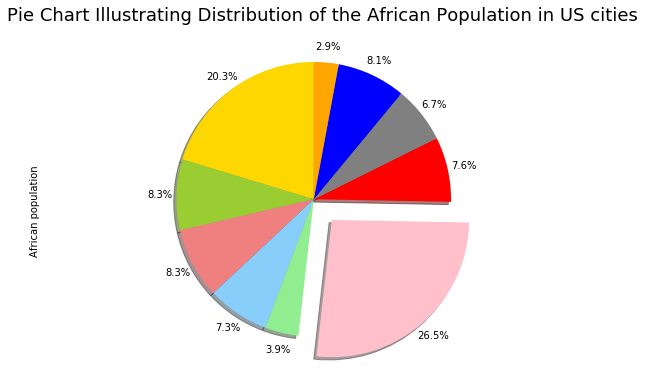

In [245]:
colours_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink', 'red', 'grey', 'blue', 'orange']
explode_list = [0, 0, 0, 0, 0, 0.2, 0, 0, 0, 0]
city_immigration_df['African population'].plot(kind = 'pie', 
                                               figsize = [10, 6], 
                                               autopct = '%1.1f%%', 
                                               startangle = 90, 
                                               shadow = True, 
                                               labels = None, 
                                               pctdistance = 1.12, 
                                               colors = colours_list, 
                                               explode = explode_list)
plt.title('Pie Chart Illustrating Distribution of the African Population in US cities\n', fontsize = 18)
plt.axis('equal')
plt.show

- This provides recommendation that a Nando's restaurant should be opened in the NYC area

#### Map of New York City Highlighting Greenpoint:

In [247]:
address = 'New York, NY'

geolocator = Nominatim(user_agent="new_york_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geographical coordinate of New York are {}, {}.'.format(latitude, longitude))

# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
folium.CircleMarker(
        [40.7305, -73.9515],
        radius=15,
        popup='Greenpoint',
        color='darkgreen',
        fill=True,
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

The geographical coordinate of New York are 40.7127281, -74.0060152.


***

***
## 5. DISCUSSION: <a name="discussion"></a>

#### 5.1 Recommendations:
5.1.1 With foursquare, there was a margin of error given that there are 42 nandos locations surrounding Chicago and DMV areas. I would need to individually inspect the locations and use the exact location to find the missing restaurant location data needed.    
5.1.2 Nandos is listed as  portuguese restaurant so I had to type in 'Nando's Peri Peri'into the search to ensure the correct venues were selected. Foursquare did not respond to my call for the specific address used to locate the 8 restaurants not included in the data. Next time, I could use a different way to obtain the restaurants information - I could have added the data directly into the dataframe from the Nando's restaurant website.  
5.1.3 More research by means of market surveys would provide better understanding about how current New York City situated South Africans (and citizens) would feel about the restaurant opening up.

#### 5.2 Considerations
5.2.1 Given the current COVID-19 situation happening, the model will definitely be flawed.  
5.2.2 More South Africans would be staying for longer periods with no flights to leave, therefore the data will need to be adjusted next year.  
5.2.3 Nando's is takeaway and dine-in, personally my family in South Africa would always use it for takeaways - this makes it accessible for social distancing standards too.  
5.2.4 An increasing amount of people are making use of takeaway and/or delivery for food and for families that have no time to cook and cannot shop, good quality food is always considered valuable to have in all areas.  
5.2.5 My project is not based how successful Nando's is as a restaurant in USA, but how much demand there will be for it to open in a heavily 'South African populated' populated area and where it should be place in NYC.

***

***
## 6. CONCLUSION: <a name="conclusion"></a>

Nando's Peri Peri is a good investment into New York City's restaurant industry given the increasing amount of South Africans residing in New York City. It has been shown that the amount of Africans overall in America will be increasing too, this include permanent residents and visiting Africans with a nonimmigrant or immigrant visa. There are a lot of factors to consider in this analysis. It is also a personal problem I have faced during my stay in the United States and I know that once endorsed right, it will succeed. The data and charts illustrate its viability of success within New York. The best neighbourhood is within Brooklyn at Greenpoint which has great variety but also less competition from other restaurants in its area. Brooklyn remains close enough to Manhattan as well as Long Island so it poses to be a more central location for any visitors or residents. Visitors to New York will be able to have the search for South African restaurants near by and the Nando's will be eligible to pop up and attract travelers. 
***